# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/competitions/playground-series-s6e2/train.csv')

In [3]:
df = df.iloc[:,1:]
df['Heart Disease'] = pd.get_dummies(df['Heart Disease'], drop_first = True)

In [4]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,True
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,False
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,False
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,False
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,56,0,1,110,226,0,0,132,0,0.0,1,0,7,False
629996,54,1,4,128,249,1,2,150,0,0.0,2,0,3,False
629997,67,1,4,130,275,0,0,149,0,0.0,1,2,7,True
629998,52,1,4,140,199,0,2,157,0,0.0,1,0,6,True


In [5]:
df['Sex'].value_counts()

Sex
1    450283
0    179717
Name: count, dtype: int64

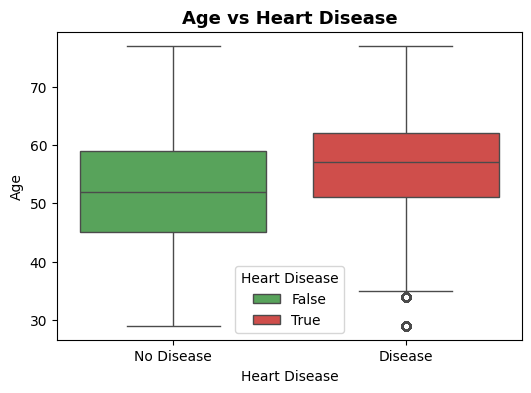

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Heart Disease', y='Age', data=df,
           hue='Heart Disease',              # <-- Required now
palette={0:"#4CAF50", 1:"#E53935"})
plt.title(f"Age vs Heart Disease", fontsize=13, fontweight='bold')
plt.xticks([0,1], ["No Disease", "Disease"])
plt.show()

1. this is a bar chart or a histogram. It shows that as the age goes up, the number of people with heart disease also goes up. Most cases seem to cluster around the 50 to 60-year-old range.

2. Something New: Doctors are seeing more young people (even in their 30s) getting heart issues now because of stress and poor diet, but the data still shows it's mostly a "50s and up" problem.

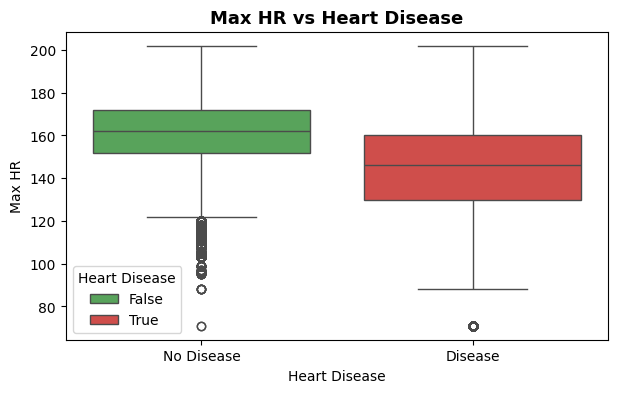

In [8]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Heart Disease', y='Max HR', data=df,
           hue='Heart Disease',              # <-- Required now
palette={0:"#4CAF50", 1:"#E53935"})
plt.title(f"Max HR vs Heart Disease", fontsize=13, fontweight='bold')
plt.xticks([0,1], ["No Disease", "Disease"])
plt.show()


1. Healthy people generally have higher Max HR: Look at the green box (No Disease). It is positioned higher on the chart than the red box. The middle line of the green box is around 160, whereas the red box is around 145. This suggests that people without heart disease tend to reach higher heart rates during exercise
2. People with Heart Disease have lower Max HR: The red box (Disease) is lower down. This implies that heart disease might limit how high a person's heart rate can go, or that lower max heart rates are a sign of the condition.


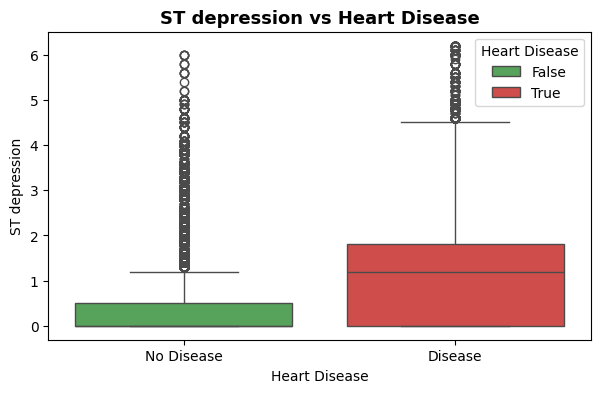

In [9]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Heart Disease', y='ST depression', data=df,
           hue='Heart Disease',              # <-- Required now
palette={0:"#4CAF50", 1:"#E53935"})
plt.title(f"ST depression vs Heart Disease", fontsize=13, fontweight='bold')
plt.xticks([0,1], ["No Disease", "Disease"])
plt.show()

Healthy People used to have lower, Depresion rates than the Dieseased Once, As the red Graph is spreaded upto almost 1.8 which is higher depression values.

/tmp/ipykernel_55/1024514168.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No Disease", "Disease"])
/tmp/ipykernel_55/1024514168.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(["No Disease", "Disease"])


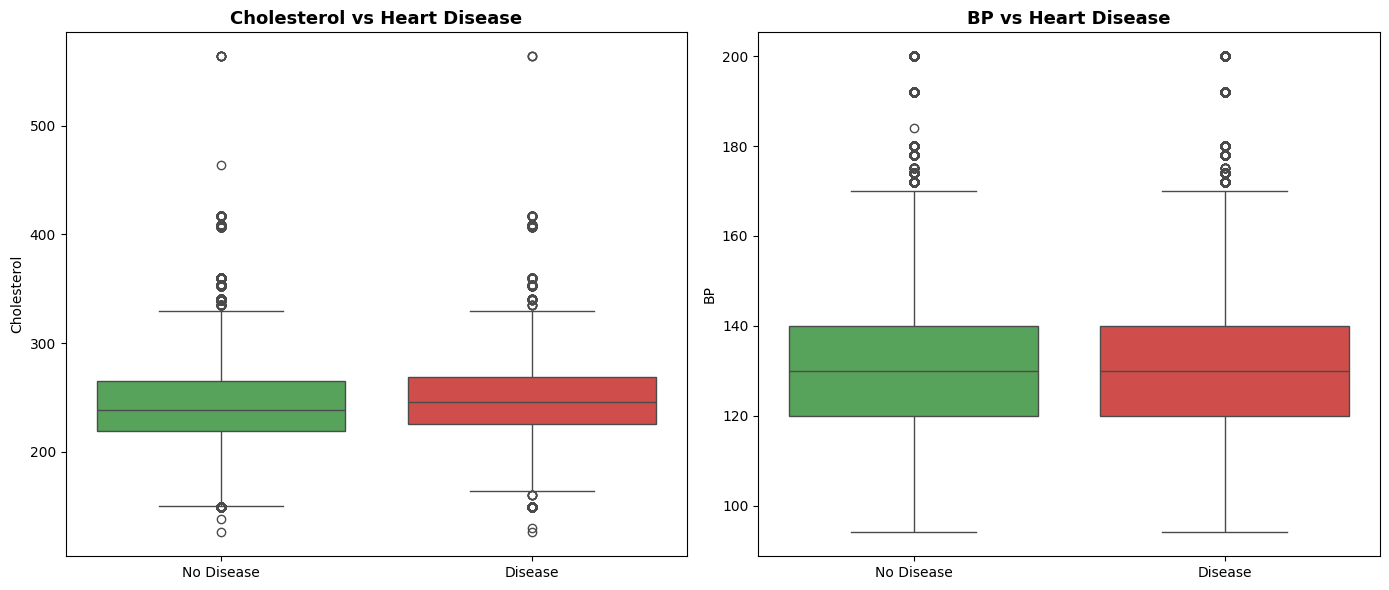

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the side-by-side layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
num_features = ['Cholesterol', 'BP']
colors = {0: "#4CAF50", 1: "#E53935"}

for i, col in enumerate(num_features):
    sns.boxplot(ax=axes[i], x='Heart Disease', y=col, data=df, 
                hue='Heart Disease', palette=colors, legend=False)
    
    axes[i].set_title(f"{col} vs Heart Disease", fontsize=13, fontweight='bold')
    axes[i].set_xticklabels(["No Disease", "Disease"])
    axes[i].set_xlabel("") # Keeps it clean

plt.tight_layout()
plt.show()

In BP, The green box (No Disease) and red box (Disease) look almost identical. Both have their middle line (median) around 130 BP, and both boxes span roughly the same range (120-140).

In Colestrol, Just like the BP chart, the green and red boxes are very similar. Both have medians around 240-250 cholesterol level, and the boxes span roughly the same range (220-270).

BP and Cholesterol in this particular dataset don't clearly separate healthy people from those with heart disease

This suggests that while high blood pressure and cholesterol are generally risk factors, they may not be definitive diagnostic tools on their own for this population

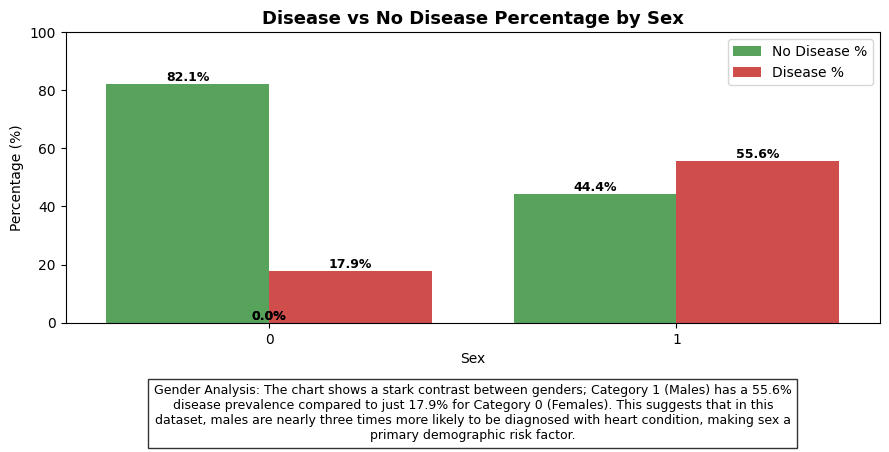

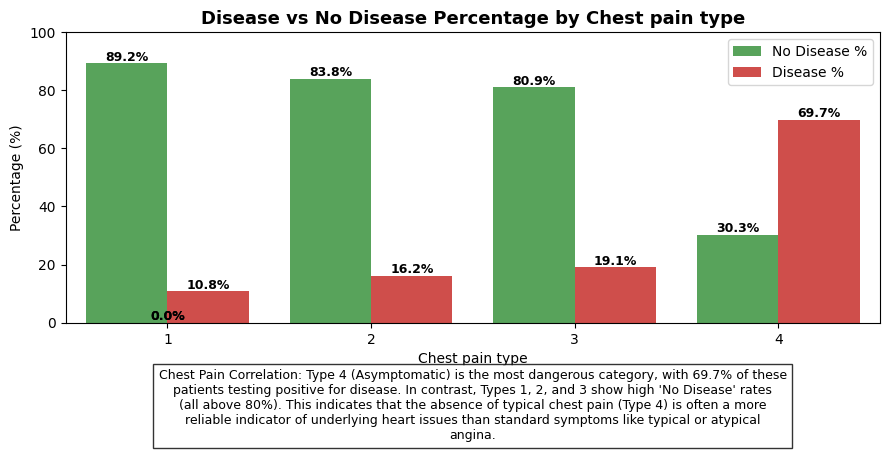

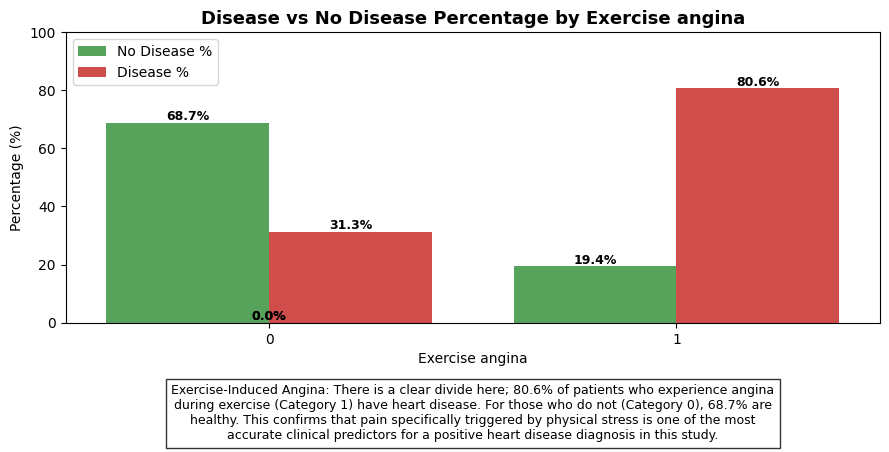

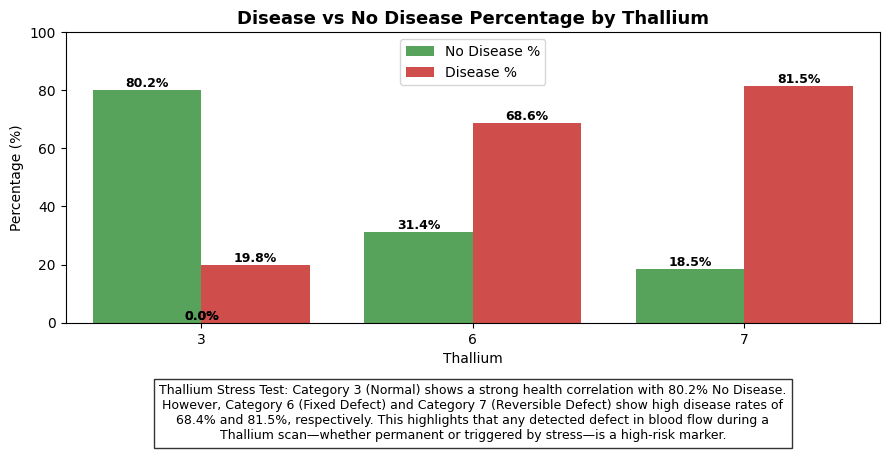

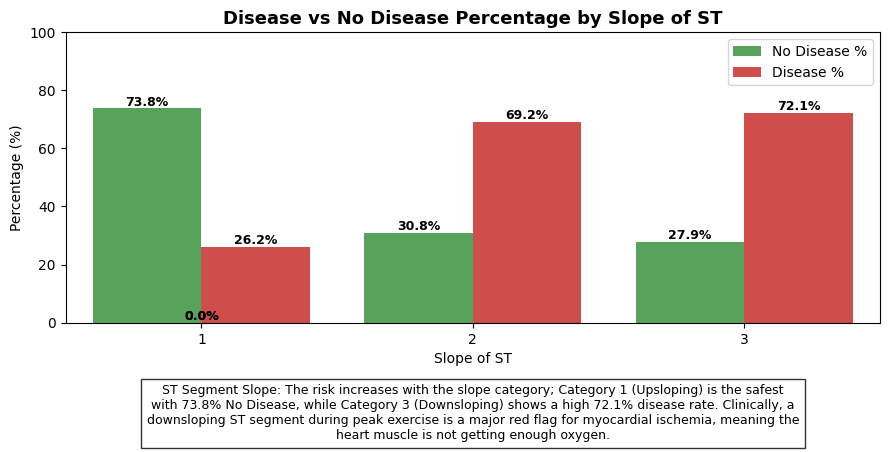

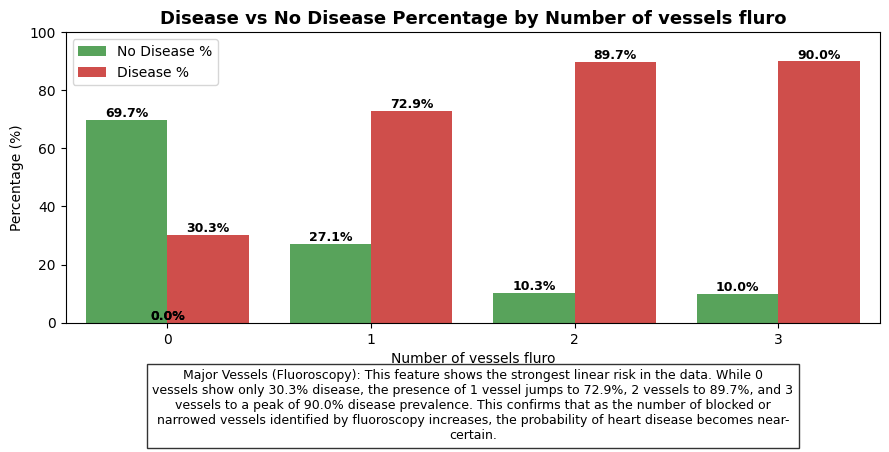

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

cat_features = ['Sex', 'Chest pain type', 'Exercise angina',
                'Thallium', 'Slope of ST', 'Number of vessels fluro']

heart_disease_insights = [
    # 1. Sex
    "Gender Analysis: The chart shows a stark contrast between genders; Category 1 (Males) has a 55.6% disease prevalence compared to just 17.9% for Category 0 (Females). This suggests that in this dataset, males are nearly three times more likely to be diagnosed with heart condition, making sex a primary demographic risk factor.",
    
    # 2. Chest pain type
    "Chest Pain Correlation: Type 4 (Asymptomatic) is the most dangerous category, with 69.7% of these patients testing positive for disease. In contrast, Types 1, 2, and 3 show high 'No Disease' rates (all above 80%). This indicates that the absence of typical chest pain (Type 4) is often a more reliable indicator of underlying heart issues than standard symptoms like typical or atypical angina.",
    
    # 3. Exercise angina
    "Exercise-Induced Angina: There is a clear divide here; 80.6% of patients who experience angina during exercise (Category 1) have heart disease. For those who do not (Category 0), 68.7% are healthy. This confirms that pain specifically triggered by physical stress is one of the most accurate clinical predictors for a positive heart disease diagnosis in this study.",
    
    # 4. Thallium
    "Thallium Stress Test: Category 3 (Normal) shows a strong health correlation with 80.2% No Disease. However, Category 6 (Fixed Defect) and Category 7 (Reversible Defect) show high disease rates of 68.4% and 81.5%, respectively. This highlights that any detected defect in blood flow during a Thallium scan—whether permanent or triggered by stress—is a high-risk marker.",
    
    # 5. Slope of ST
    "ST Segment Slope: The risk increases with the slope category; Category 1 (Upsloping) is the safest with 73.8% No Disease, while Category 3 (Downsloping) shows a high 72.1% disease rate. Clinically, a downsloping ST segment during peak exercise is a major red flag for myocardial ischemia, meaning the heart muscle is not getting enough oxygen.",
    
    # 6. Number of vessels fluro
    "Major Vessels (Fluoroscopy): This feature shows the strongest linear risk in the data. While 0 vessels show only 30.3% disease, the presence of 1 vessel jumps to 72.9%, 2 vessels to 89.7%, and 3 vessels to a peak of 90.0% disease prevalence. This confirms that as the number of blocked or narrowed vessels identified by fluoroscopy increases, the probability of heart disease becomes near-certain."
]

for i,col in enumerate(cat_features):
    
    # Calculate percentage for both 0 and 1
    percent_df = (
        df.groupby(col)['Heart Disease']
        .value_counts(normalize=True)
        .unstack() * 100
    ).reset_index()
    
    percent_df.columns = [col, 'No Disease %', 'Disease %']
    
    # Melt for seaborn
    melt_df = percent_df.melt(id_vars=col,
                              value_vars=['No Disease %', 'Disease %'],
                              var_name='Condition',
                              value_name='Percentage')
    
    plt.figure(figsize=(9,5))
    
    bars = sns.barplot(
        x=col,
        y='Percentage',
        hue='Condition',
        data=melt_df,
        palette=["#4CAF50", "#E53935"]
    )
    
    # Add percentage labels
    for p in bars.patches:
        height = p.get_height()
        bars.annotate(f'{height:.1f}%',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom',
                      fontsize=9, fontweight='bold')
    
    plt.title(f"Disease vs No Disease Percentage by {col}",
              fontsize=13, fontweight='bold')
    plt.ylim(0, 100)
    plt.ylabel("Percentage (%)")
    plt.gca().text(
        0.5, -0.4,
        textwrap.fill(heart_disease_insights[i], 100),
        transform=plt.gca().transAxes,
        ha='center',
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.8)
    )

    plt.tight_layout()
    plt.legend()
    plt.show()


<Axes: >

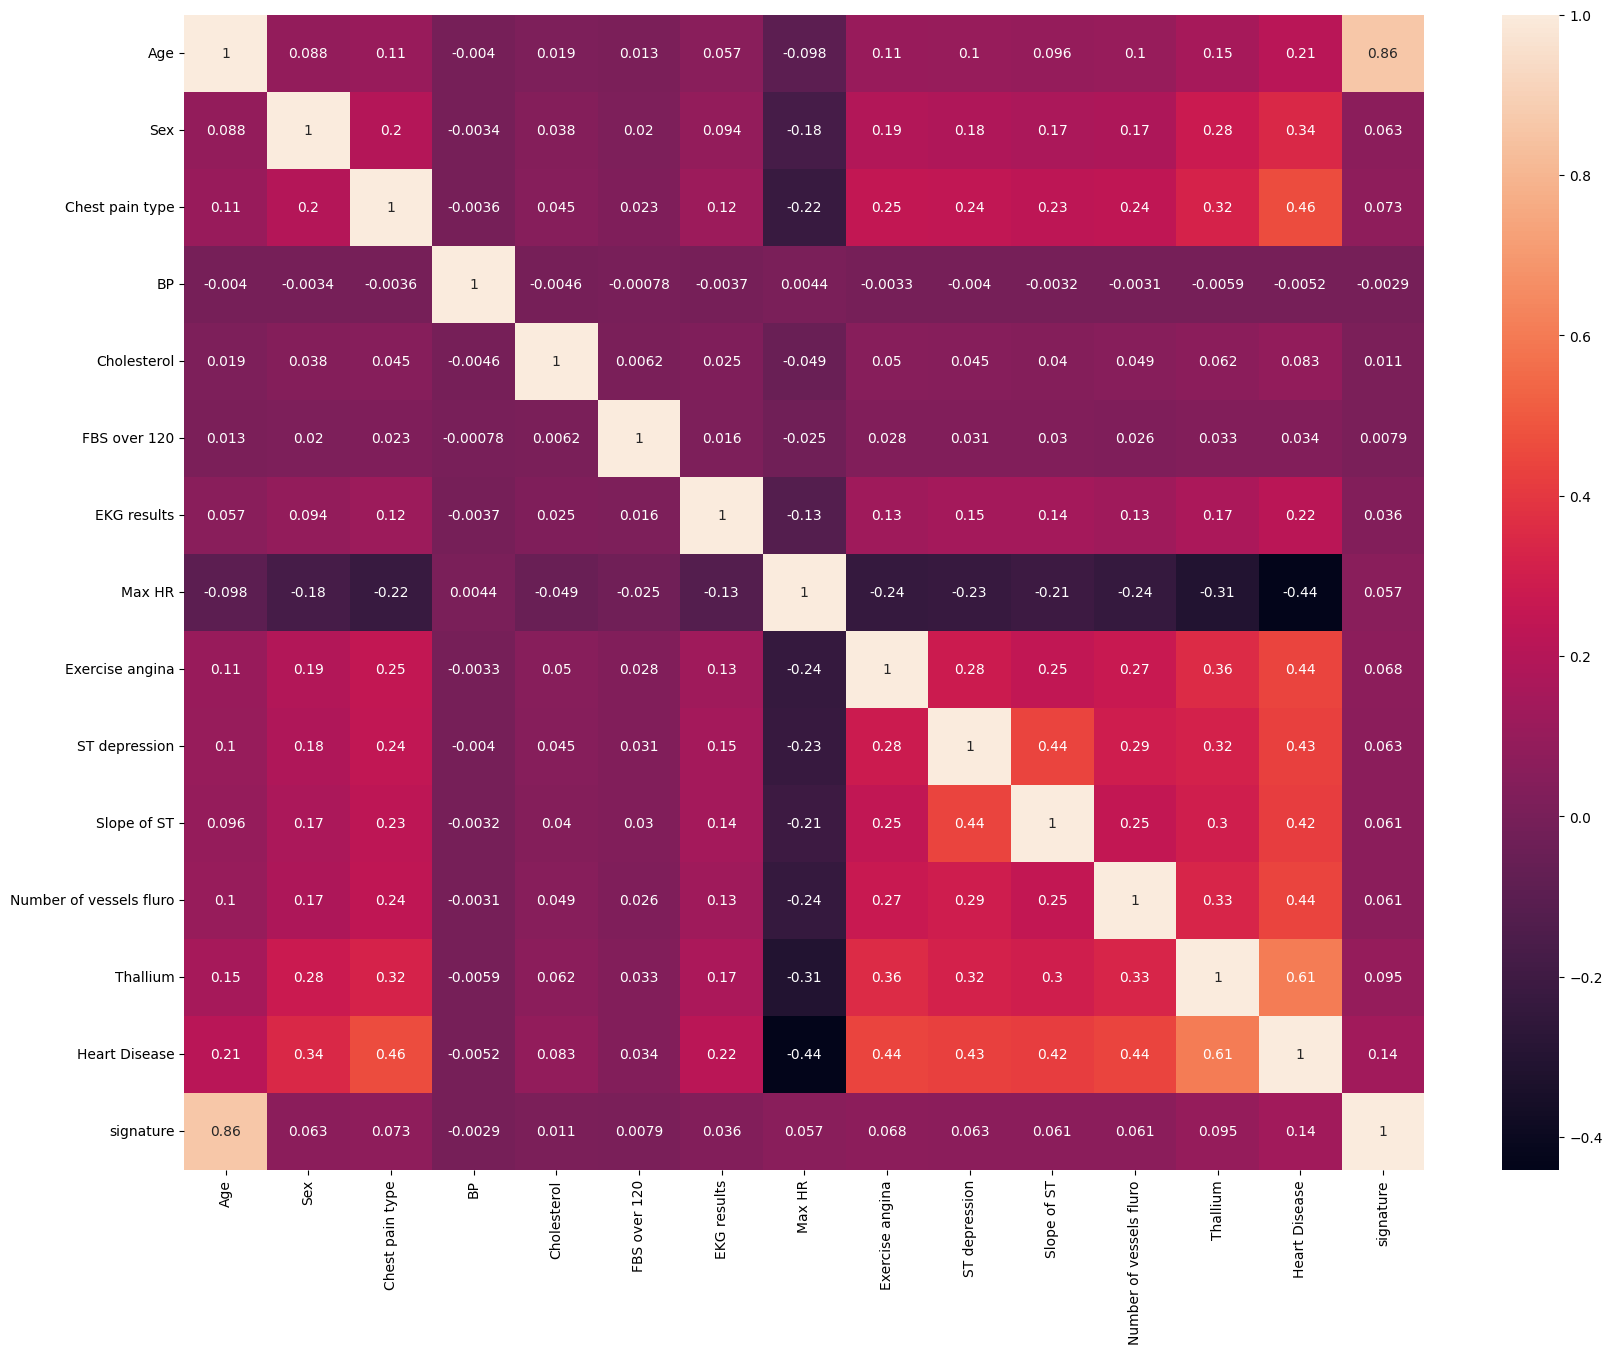

In [54]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot=True)

In [55]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant (required)
X = df.iloc[:,:-1].assign(const=1)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print(vif_data)


                    Feature         VIF
0                       Age    1.048732
1                       Sex    1.147919
2           Chest pain type    1.283878
3                        BP    1.000078
4               Cholesterol    1.007744
5              FBS over 120    1.002223
6               EKG results    1.060576
7                    Max HR    1.253775
8           Exercise angina    1.290313
9             ST depression    1.397995
10              Slope of ST    1.352527
11  Number of vessels fluro    1.280912
12                 Thallium    1.642967
13            Heart Disease    2.510285
14                    const  291.375558


<Axes: >

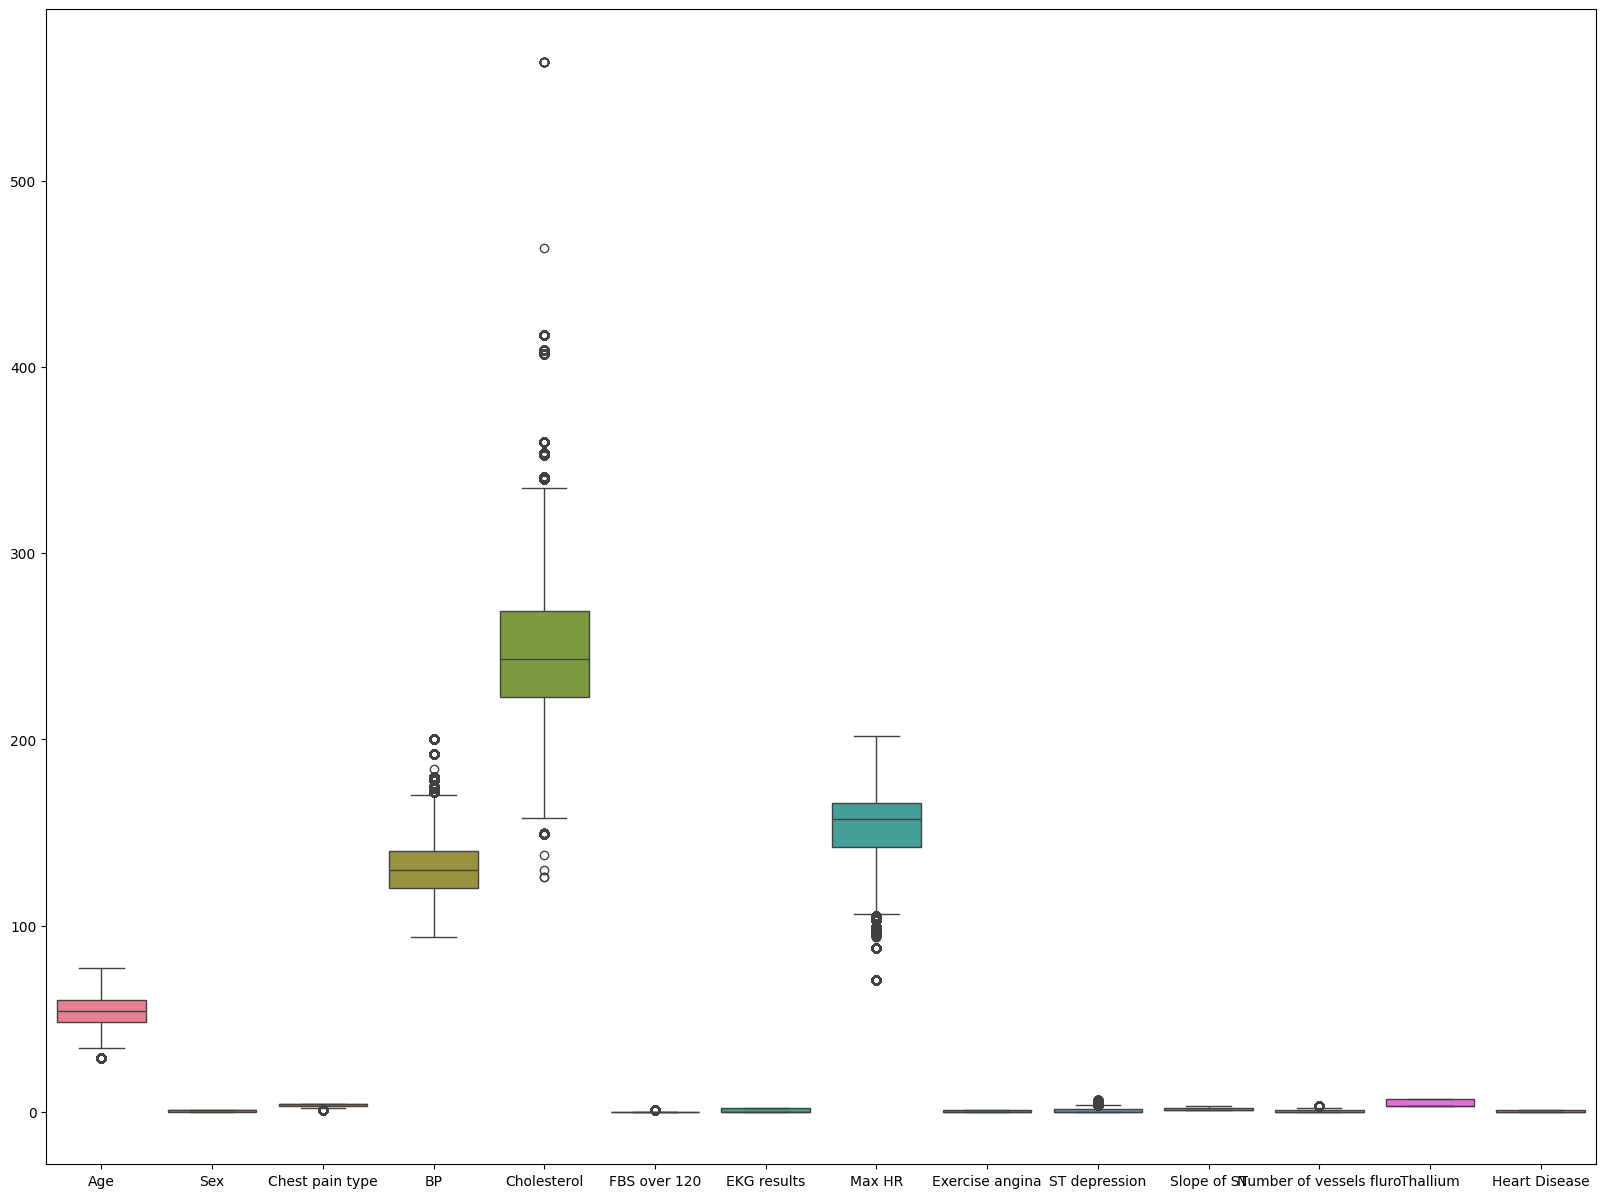

In [56]:
plt.figure(figsize = (20,15))
sns.boxplot(df)

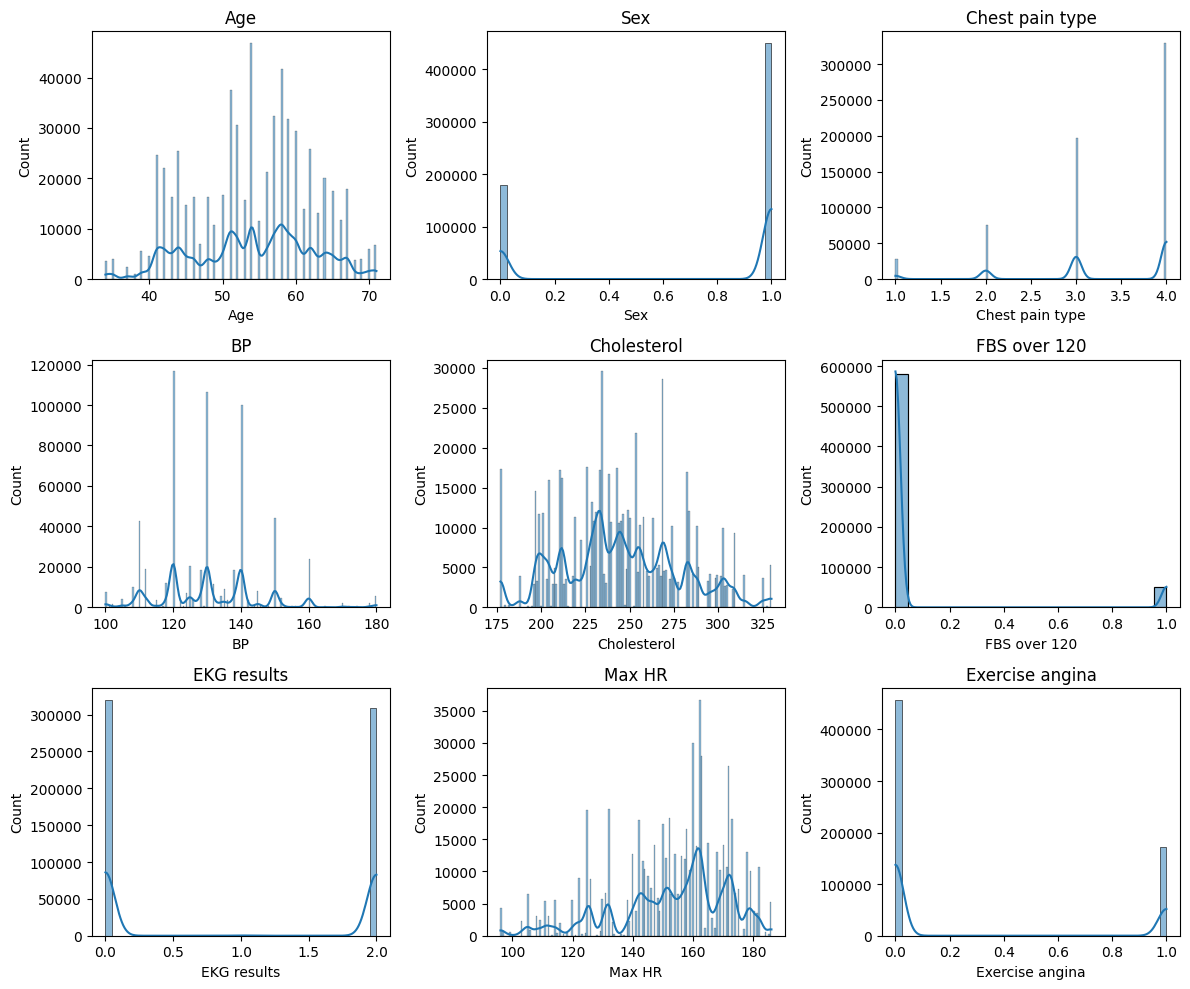

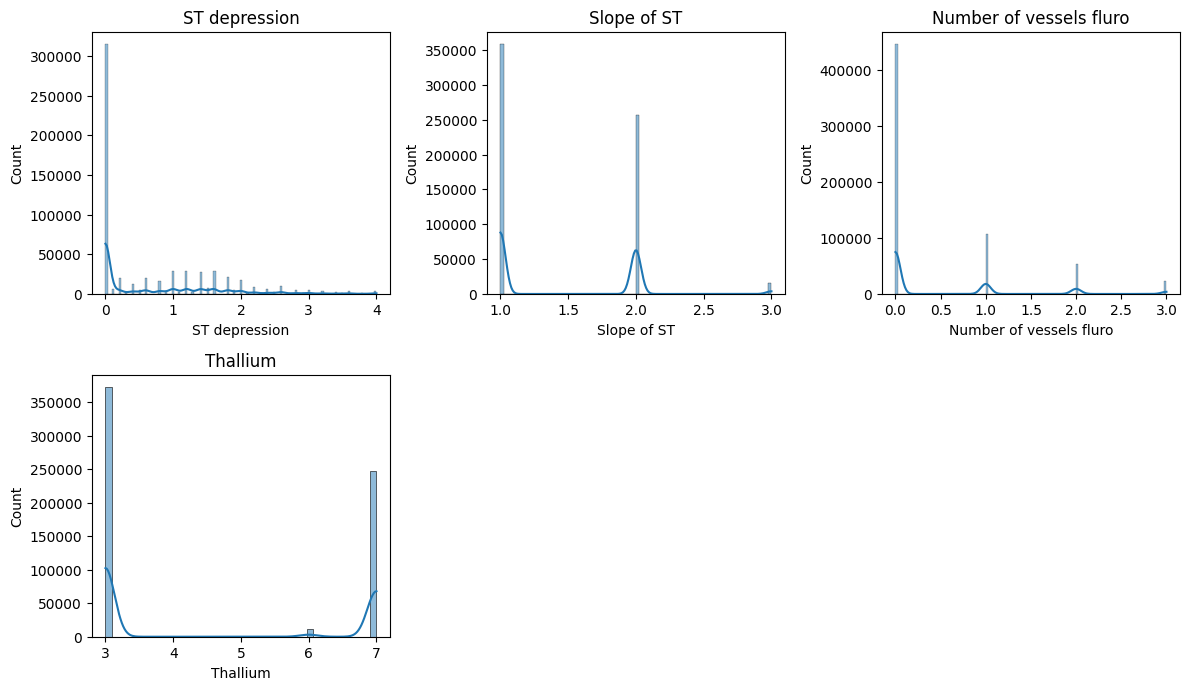

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_distributions(df):
    num_cols = df.select_dtypes(include=np.number).columns
    n = len(num_cols)

    for i in range(0, n, 9):  # 9 plots per figure
        cols = num_cols[i:i+9]

        fig, axes = plt.subplots(3, 3, figsize=(12, 10))
        axes = axes.flatten()

        for ax, col in zip(axes, cols):
            sns.histplot(df[col], kde=True, ax=ax)
            ax.set_title(col)

        # remove empty subplots
        for j in range(len(cols), 9):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

plot_distributions(df)

# Outlier Binning

In [7]:
import pandas as pd
import numpy as np

def clip_outliers_all_columns(df, lower_q=0.005, upper_q=0.995, verbose=True):
    """
    Clips outliers in all numeric columns using percentile capping.

    Parameters:
        df : pandas DataFrame
        lower_q : lower percentile (default 0.5%)
        upper_q : upper percentile (default 99.5%)
        verbose : print clipping summary

    Returns:
        df_clipped : processed dataframe
    """

    df_clipped = df.copy()

    numeric_cols = df_clipped.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:

        # Skip binary columns (0/1)
        unique_vals = df_clipped[col].dropna().unique()
        if len(unique_vals) <= 2:
            continue

        lower = df_clipped[col].quantile(lower_q)
        upper = df_clipped[col].quantile(upper_q)

        before_outliers = ((df_clipped[col] < lower) | (df_clipped[col] > upper)).sum()

        df_clipped[col] = df_clipped[col].clip(lower, upper)

        if verbose:
            print(f"{col:15} | clipped values: {before_outliers}")

    return df_clipped

temp = clip_outliers_all_columns(df)

Age             | clipped values: 3348
Chest pain type | clipped values: 0
BP              | clipped values: 2978
Cholesterol     | clipped values: 3022
EKG results     | clipped values: 0
Max HR          | clipped values: 3727
ST depression   | clipped values: 2600
Slope of ST     | clipped values: 0
Number of vessels fluro | clipped values: 0
Thallium        | clipped values: 0


<Axes: >

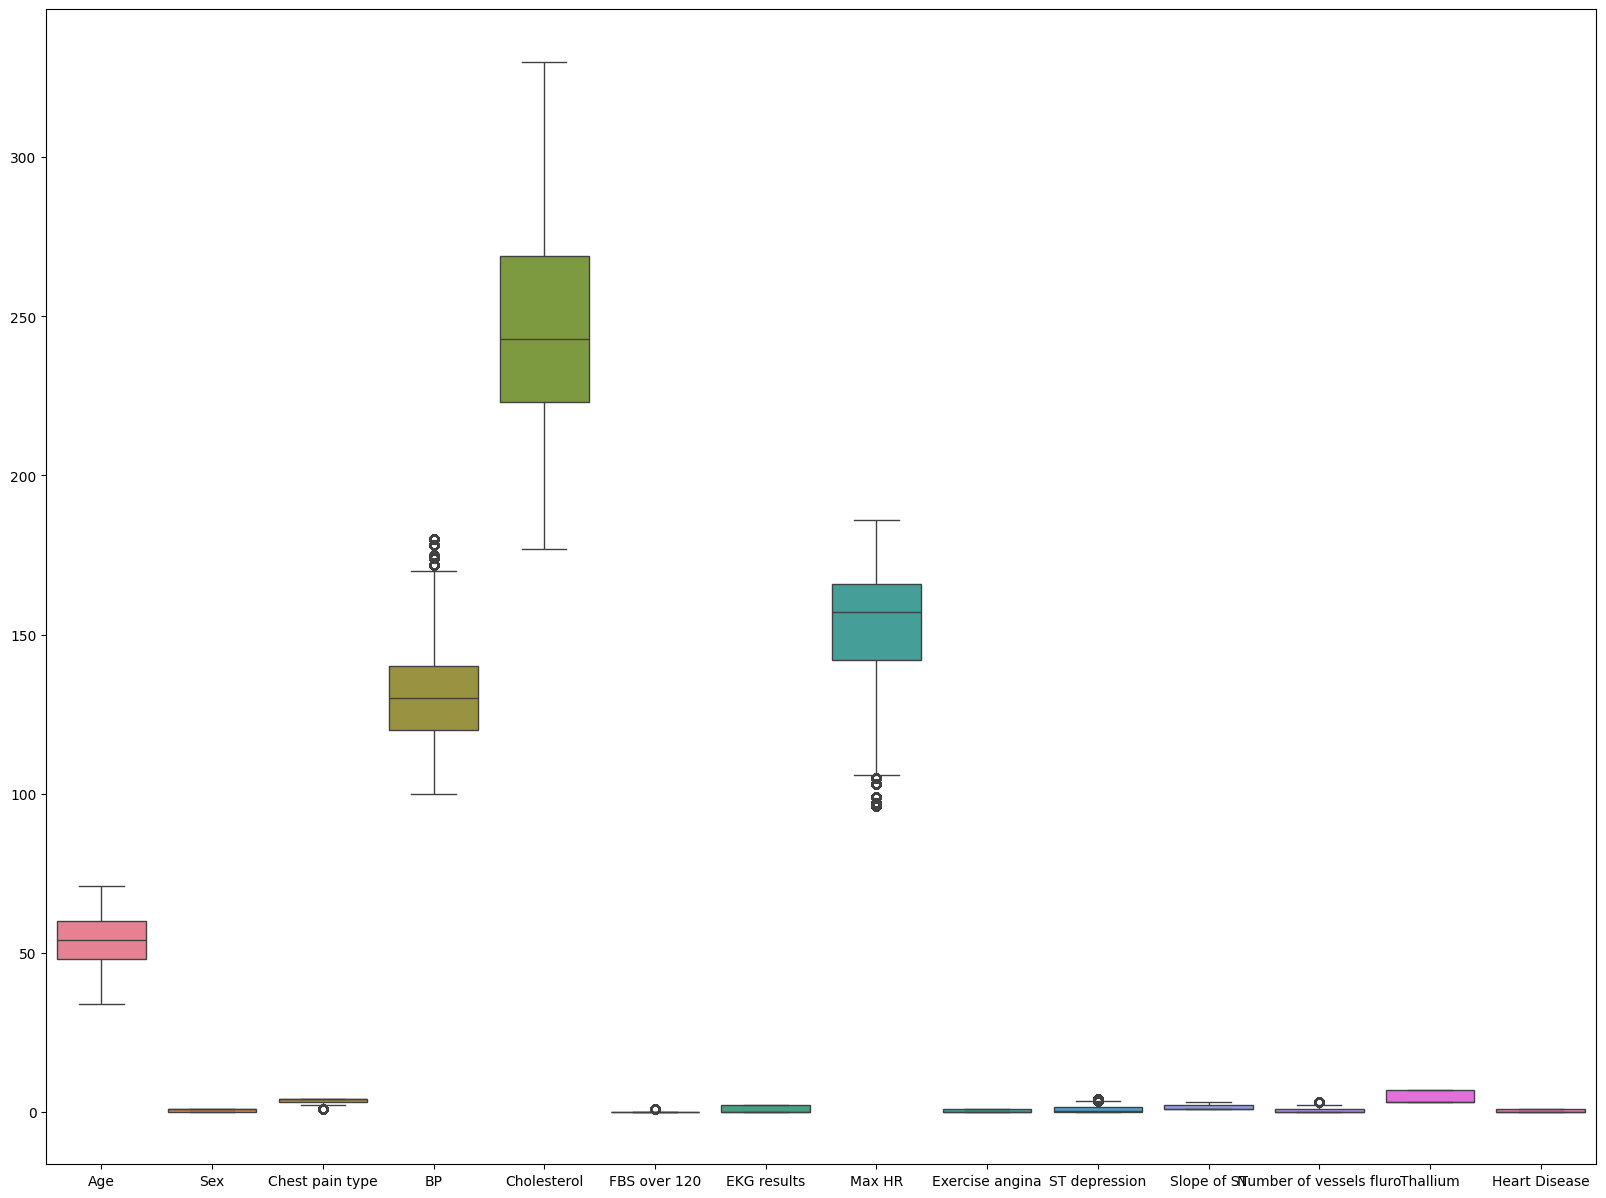

In [8]:
plt.figure(figsize = (20,15))
sns.boxplot(temp)

# Neural Network

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/kaggle/input/competitions/playground-series-s6e2/train.csv')
test = pd.read_csv('/kaggle/input/competitions/playground-series-s6e2/test.csv')
sample = pd.read_csv('/kaggle/input/competitions/playground-series-s6e2/sample_submission.csv')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2026-02-18 16:21:37.598952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771431697.787129      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771431697.839937      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771431698.358495      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771431698.358538      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771431698.358541      55 computation_placer.cc:177] computation placer alr

In [134]:
X = df.iloc[:,1:-1]
Y = df['Heart Disease']

Y = pd.get_dummies(df['Heart Disease'], drop_first=True)


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [65]:
model = keras.Sequential([
    
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # binary classification
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1771320287.822273      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13729 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1771320287.827444      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13757 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [66]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(),
        keras.metrics.Recall(),
        keras.metrics.AUC(name="auc")
    ]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,769 (190.50 KB)

 Trainable params: 47,809 (186.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [67]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=10,
    min_lr=1e-5
)


In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=100,
        batch_size=512,
        callbacks=[early_stop, reduce_lr],
        verbose=1
    )


# CATBoost

In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [3]:
# make sure target already converted to 0/1
df["Heart Disease"] = df["Heart Disease"].map({"Presence":1,"Absence":0})

# drop id
df = df.drop(columns=["id"])

# create patient identity key
df["signature"] = (
    df["Age"].astype(str) + "_" +
    df["Sex"].astype(str) + "_" +
    df["Chest pain type"].astype(str) + "_" +
    df["Cholesterol"].astype(str) + "_" +
    df["Max HR"].astype(str)
)


from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, valid_idx in gss.split(df, groups=df["signature"]):
    train_df = df.iloc[train_idx].copy()
    valid_df = df.iloc[valid_idx].copy()


In [4]:
TARGET = "Heart Disease"

X_train = train_df.drop(columns=[TARGET, "signature"])
y_train = train_df[TARGET]

X_valid = valid_df.drop(columns=[TARGET, "signature"])
y_valid = valid_df[TARGET]

In [5]:
cat_features = [
    "Sex","Chest pain type","FBS over 120","EKG results",
    "Exercise angina","Slope of ST","Number of vessels fluro","Thallium"
]

from catboost import Pool

train_pool = Pool(X_train, y_train, cat_features=cat_features)
valid_pool = Pool(X_valid, y_valid, cat_features=cat_features)


In [6]:
X_train

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3
6,59,1,4,130,246,0,2,152,0,0.8,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629994,58,1,4,150,235,0,0,162,0,0.2,1,2,3
629995,56,0,1,110,226,0,0,132,0,0.0,1,0,7
629996,54,1,4,128,249,1,2,150,0,0.0,2,0,3
629998,52,1,4,140,199,0,2,157,0,0.0,1,0,6


In [25]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=5000,
    learning_rate=0.03,
    depth=5,
    l2_leaf_reg=8,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    task_type="GPU",
    devices="0",
    early_stopping_rounds=300,
    verbose=200
)

model.fit(train_pool, eval_set=valid_pool, use_best_model=True)


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9137371	best: 0.9137371 (0)	total: 50.9ms	remaining: 4m 14s
200:	test: 0.9544602	best: 0.9544602 (200)	total: 7.27s	remaining: 2m 53s
400:	test: 0.9549132	best: 0.9549132 (400)	total: 14.4s	remaining: 2m 44s
600:	test: 0.9552257	best: 0.9552257 (600)	total: 21.5s	remaining: 2m 37s
800:	test: 0.9554313	best: 0.9554313 (800)	total: 28.5s	remaining: 2m 29s
1000:	test: 0.9555448	best: 0.9555448 (1000)	total: 35.6s	remaining: 2m 22s
1200:	test: 0.9556331	best: 0.9556332 (1199)	total: 42.7s	remaining: 2m 15s
1400:	test: 0.9556849	best: 0.9556849 (1399)	total: 49.8s	remaining: 2m 7s
1600:	test: 0.9557390	best: 0.9557390 (1600)	total: 56.9s	remaining: 2m
1800:	test: 0.9557732	best: 0.9557732 (1800)	total: 1m 3s	remaining: 1m 53s
2000:	test: 0.9558017	best: 0.9558018 (1998)	total: 1m 11s	remaining: 1m 46s
2200:	test: 0.9558212	best: 0.9558212 (2200)	total: 1m 18s	remaining: 1m 39s
2400:	test: 0.9558303	best: 0.9558303 (2400)	total: 1m 25s	remaining: 1m 32s
2600:	test: 0.9558424	best:

In [26]:
y_pred = model.predict(X_valid)

In [27]:
accuracy_score(y_valid, y_pred) # 0.8893633232273528 #0.8894188796647566 #0.8895617390752234 # 0.8893950697630121 
# 0.8894268162986714

0.8888747988872421

In [29]:
results = model.predict_proba(test.iloc[:,1:])

In [30]:
sample['Heart Disease'] = 1- results

In [31]:
sample.to_csv('sumissions.csv', index = False)

In [32]:
sample

,id,Heart Disease
0,630000,0.950243
1,630001,0.006240
2,630002,0.989472
3,630003,0.003891
4,630004,0.204154
...,...,...
269995,899995,0.154982
269996,899996,0.660397
269997,899997,0.049586
269998,899998,0.189463


In [33]:
import joblib

# Save the model
joblib.dump(model, 'catboost_model.pkl')


['catboost_model.pkl']

## Feature importances

In [47]:
imp = model.get_feature_importance(prettified=True)

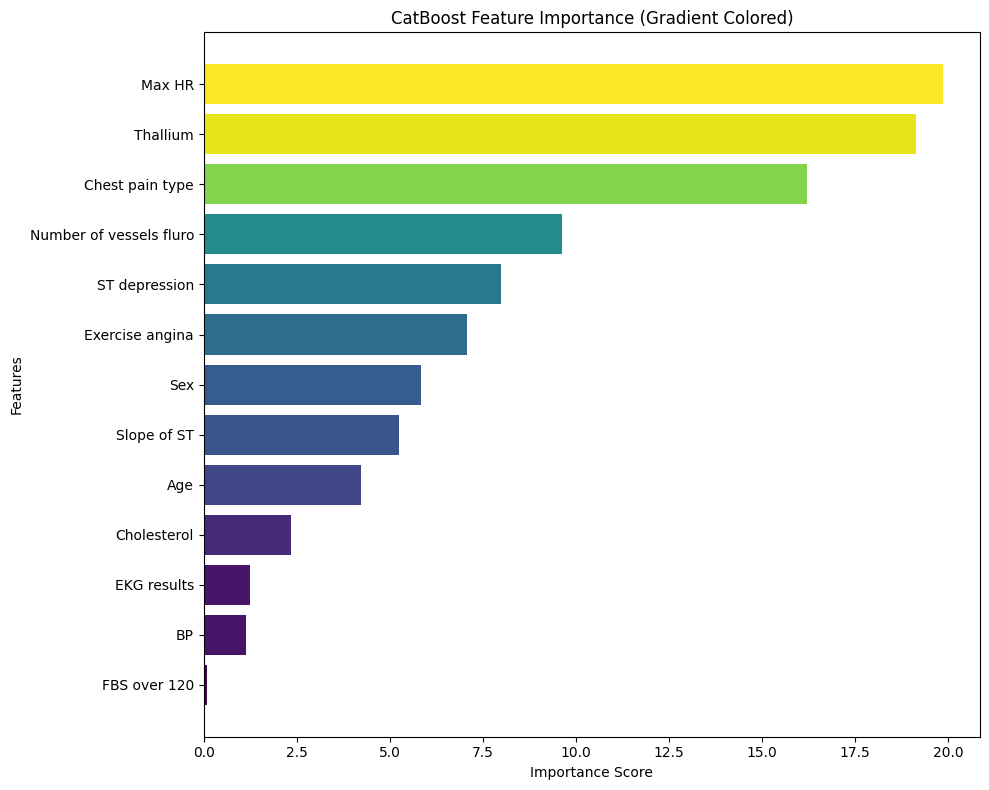

In [53]:
norm = plt.Normalize(imp["Importances"].min(), imp["Importances"].max())
colors = plt.cm.viridis(norm(imp["Importances"]))

plt.figure(figsize=(10, 8))
plt.barh(imp["Feature Id"], imp["Importances"], color=colors)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance (Gradient Colored)")
plt.tight_layout()
plt.show()

# Hyper Parameter Tuning

In [20]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np


In [7]:
base_model = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    task_type="GPU",
    devices="0",
    random_seed=42,
    verbose=200   # <-- you will see training progress
)


In [8]:
param_dist = {
    'depth': [5,6,7,8,9],
    'learning_rate': [0.01,0.02,0.03,0.05,0.07],
    'l2_leaf_reg': [3,5,7,9,11],
    'bagging_temperature': [0,0.3,0.6,1],
    'random_strength': [0,1,2,5],
    'border_count': [64,128,254],
    'iterations': [3000,4000,5000]
}


In [11]:
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)


In [12]:
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)


In [13]:
search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,          # small but effective
    scoring=auc_scorer,
    cv=cv,
    verbose=3,          # shows fold progress
    random_state=42,
    n_jobs=1            # IMPORTANT for GPU
)


In [ ]:
search.fit(
    X_train, y_train,
    eval_set=(X_valid, y_valid),
    early_stopping_rounds=300,
    use_best_model=True
)


In [36]:
search.best_params_

{'random_strength': 5,
 'learning_rate': 0.05,
 'l2_leaf_reg': 11,
 'iterations': 4000,
 'depth': 7,
 'border_count': 128,
 'bagging_temperature': 1}

In [70]:
bagging_temperature=0.3, border_count=254, depth=7, iterations=5000, l2_leaf_reg=5, learning_rate=0.01, random_strength=2

 bagging_temperature=0.6, border_count=128, depth=7, iterations=4000, l2_leaf_reg=11, learning_rate=0.02, random_strength=0;

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2391123871.py, line 1)

In [28]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=5000,
    random_strength = 2,
    learning_rate=0.04,
    depth=7,
    l2_leaf_reg = 5,
    loss_function='Logloss',
    border_count = 254,
    bagging_temperature = 0.3,
    eval_metric='AUC',
    random_seed=42,
    task_type="GPU",
    devices="0",
    early_stopping_rounds=500,
    verbose=200
)

model.fit(train_pool, eval_set=valid_pool, use_best_model=True)

# Best : 95573 , 9557366967 ,,,,0.955742538

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9386396	best: 0.9386396 (0)	total: 76.6ms	remaining: 6m 22s
200:	test: 0.9547723	best: 0.9547723 (200)	total: 10.4s	remaining: 4m 9s
400:	test: 0.9552510	best: 0.9552510 (400)	total: 20.6s	remaining: 3m 55s
600:	test: 0.9555920	best: 0.9555920 (600)	total: 31s	remaining: 3m 46s
800:	test: 0.9557003	best: 0.9557003 (800)	total: 41.4s	remaining: 3m 37s
1000:	test: 0.9557324	best: 0.9557331 (988)	total: 51.9s	remaining: 3m 27s
1200:	test: 0.9557431	best: 0.9557449 (1183)	total: 1m 2s	remaining: 3m 17s
1400:	test: 0.9557443	best: 0.9557459 (1385)	total: 1m 12s	remaining: 3m 7s
1600:	test: 0.9557270	best: 0.9557459 (1385)	total: 1m 23s	remaining: 2m 56s
1800:	test: 0.9557056	best: 0.9557459 (1385)	total: 1m 33s	remaining: 2m 46s
bestTest = 0.9557458758
bestIteration = 1385
Shrink model to first 1386 iterations.


# XGBoost

In [30]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_valid, label=y_valid)


In [33]:
import xgboost as xgb

params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",

    # learning behaviour
    "eta": 0.02,              # learning_rate
    "max_depth": 4,
    "min_child_weight": 2,

    # regularization
    "gamma": 0.1,
    "lambda": 1.5,            # L2
    "alpha": 0.1,             # L1

    # randomness (very important for AUC)
    "subsample": 0.8,
    "colsample_bytree": 0.8,

    # tree building
    "tree_method": "hist",   # GPU training
    "seed": 42
}


In [ ]:
watchlist = [(dtrain, "train"), (dtest, "validation")]

model = xgb.train(
    params,
    dtrain,
    num_boost_round=4000,
    evals=watchlist,
    maximize=True,                # maximize accuracy
    early_stopping_rounds=500,
    verbose_eval=50
    
)


In [37]:
y_pred = model.predict(dtest)

In [38]:
y_pred

array([0.04129795, 0.9899635 , 0.20969763, ..., 0.7816107 , 0.43293333,
       0.00498174], dtype=float32)

In [39]:
y_final = []
for i in y_pred:
    if i >= 0.5:
        y_final.append(1)
    else: 
        y_final.append(0)

In [40]:
accuracy_score(y_valid, y_final)


0.8891807806473119